In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time 
from tqdm.notebook import tqdm

In [2]:
from path_overlap import * 

In [3]:
MPG = multipartite_network(4, 5, 5, 1)

In [4]:
pos = nx.multipartite_layout(MPG)

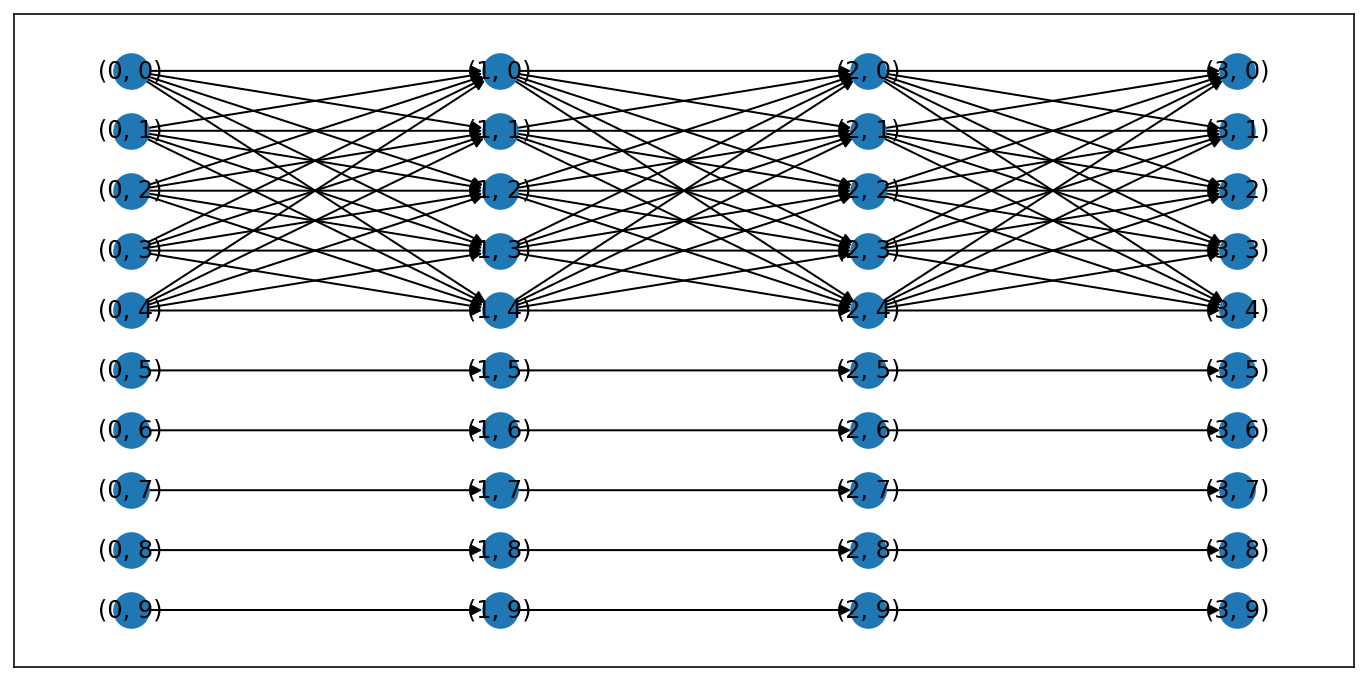

In [5]:
fig = plt.figure(figsize=(12,6))
nx.draw_networkx(MPG, pos)

In [6]:
rew_MPG, counts = rewire_multipartite_network(MPG, 10, rewire_prob=.9, verbose=True, rewire_iters=100)

In [7]:
rew_pos = nx.multipartite_layout(rew_MPG)

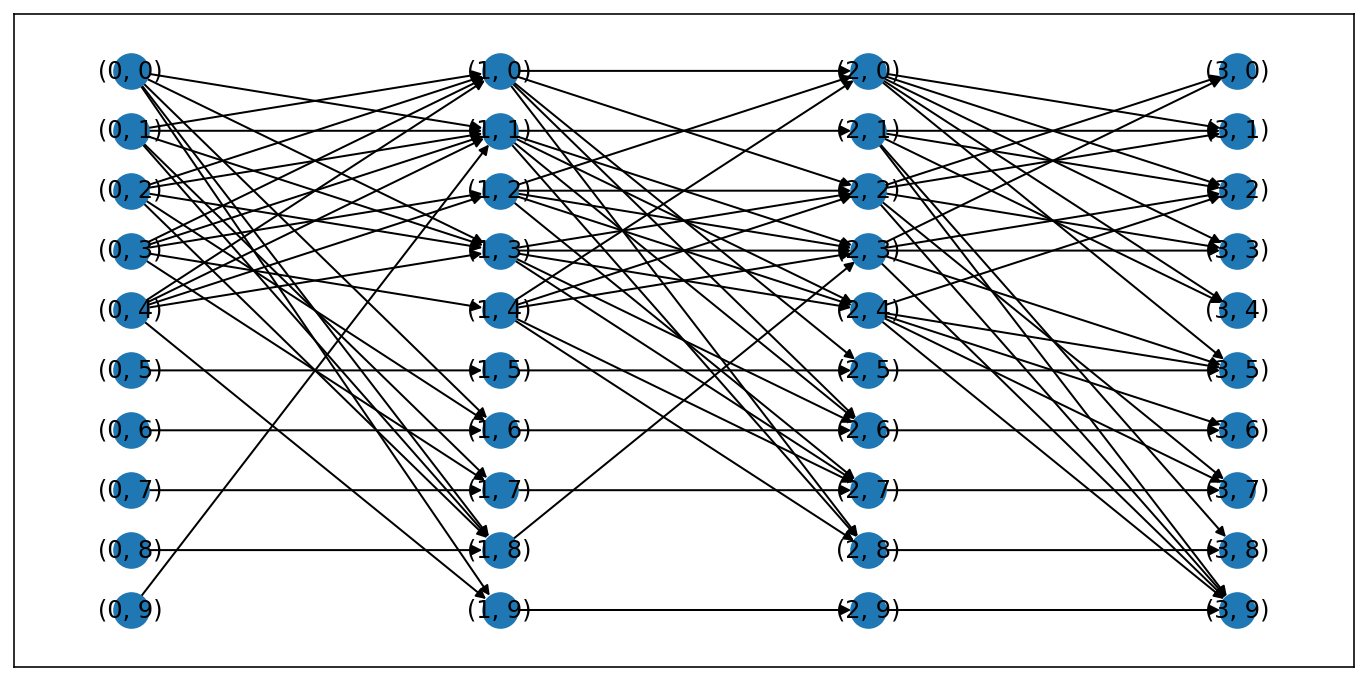

In [8]:
fig = plt.figure(figsize=(12,6))
nx.draw_networkx(rew_MPG, pos)

In [9]:
from itertools import product
output_nodes = [(3, x) for x in range(10)]
input_nodes = [(0, x) for x in range(10)]

paths = {}
for n, nn in product(input_nodes, output_nodes):
    paths[(n, nn)] = list(nx.all_simple_paths(MPG, n, nn));
    
rew_paths = {}
for n, nn in product(input_nodes, output_nodes):
    rew_paths[(n, nn)] = list(nx.all_simple_paths(rew_MPG, n, nn));

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


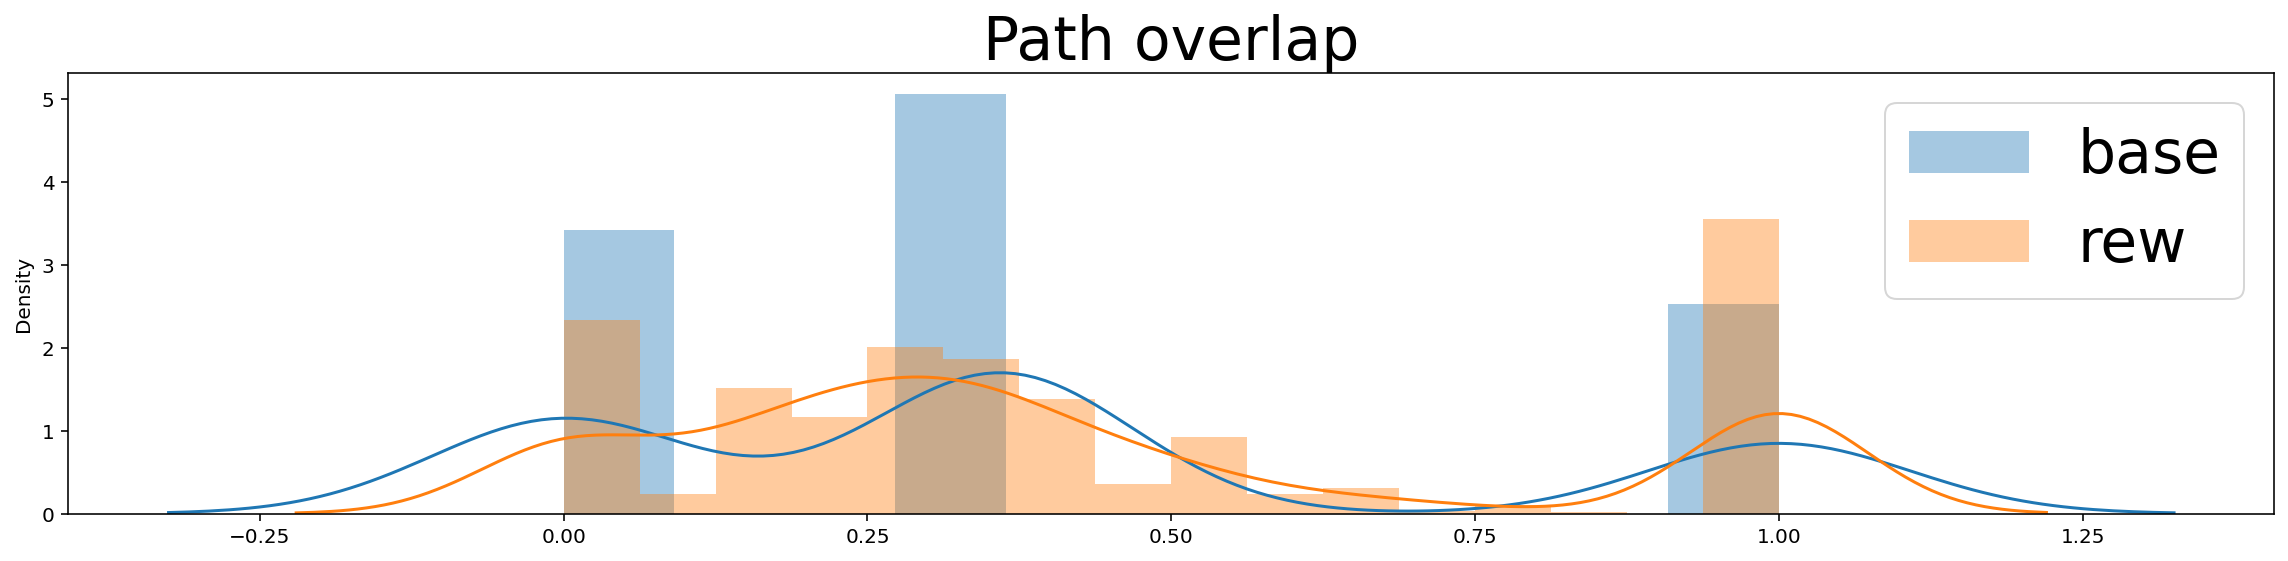

In [10]:
from itertools import combinations

overlaps = []
for path_set_1, path_set_2 in tqdm(list(combinations(paths.values(),2))):
    ov = interference_overlap(path_set_1, path_set_2);
    if ov!=None:
        overlaps.append(ov)
        
rew_overlaps = []
for path_set_1, path_set_2 in tqdm(list(combinations(rew_paths.values(),2))):
    ov = interference_overlap(path_set_1, path_set_2);
    if ov!=None:
        rew_overlaps.append(ov)


import seaborn as sns 
fig = plt.figure(figsize=(16,4))
sns.distplot(overlaps, label='base')
sns.distplot(rew_overlaps, label='rew')
plt.legend(fontsize=30)
plt.title('Path overlap', fontsize=30)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


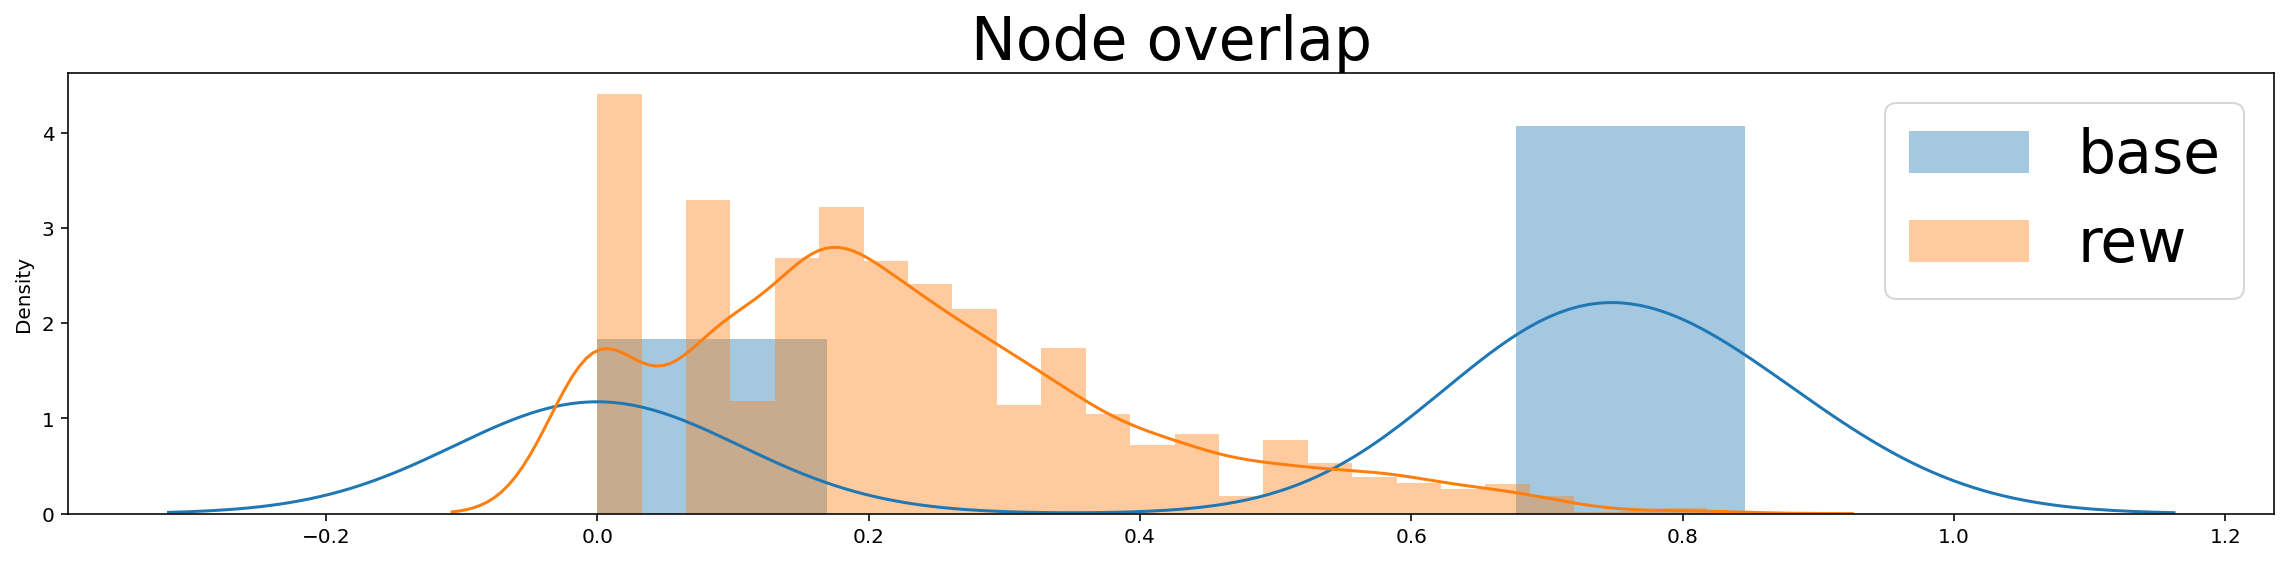

In [11]:
from itertools import combinations

overlaps = []
for path_set_1, path_set_2 in tqdm(list(combinations(paths.values(),2))):
    ov = node_interference_overlap(path_set_1, path_set_2);
    if ov!=None:
        overlaps.append(ov)
        
rew_overlaps = []
for path_set_1, path_set_2 in tqdm(list(combinations(rew_paths.values(),2))):
    ov = node_interference_overlap(path_set_1, path_set_2);
    if ov!=None:
        rew_overlaps.append(ov)


import seaborn as sns 
fig = plt.figure(figsize=(16,4))
sns.distplot(overlaps, label='base')
sns.distplot(rew_overlaps, label='rew')
plt.legend(fontsize=30)
plt.title('Node overlap', fontsize=30)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


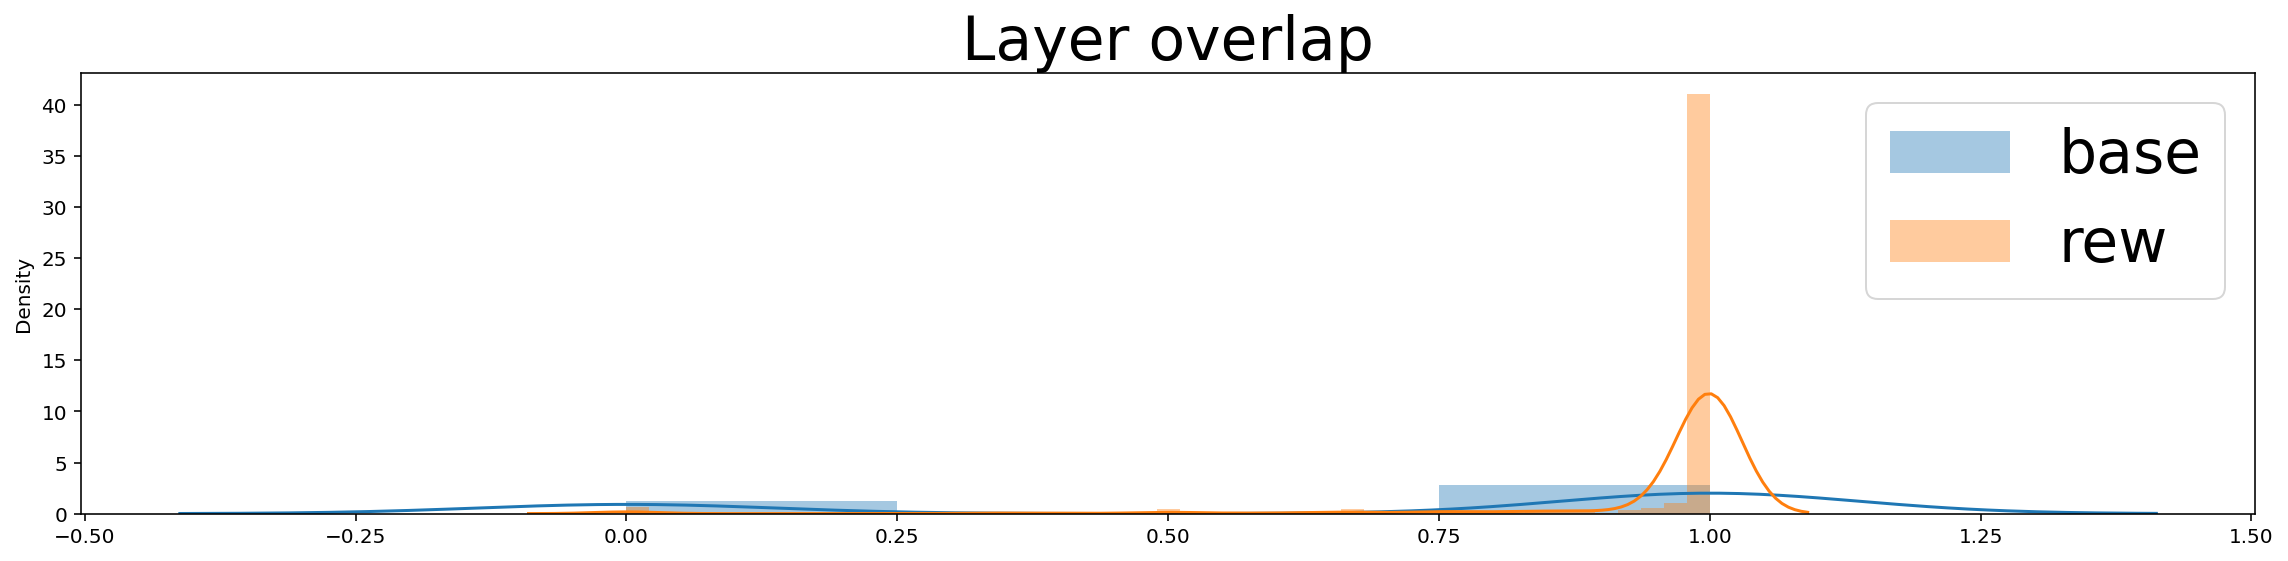

In [12]:
from itertools import combinations

overlaps = []
for path_set_1, path_set_2 in tqdm(list(combinations(paths.values(),2))):
    ov = layer_interference_overlap(MPG, path_set_1, path_set_2);
    if ov!=None:
        overlaps.append(ov)
        
rew_overlaps = []
for path_set_1, path_set_2 in tqdm(list(combinations(rew_paths.values(),2))):
    ov = layer_interference_overlap(rew_MPG, path_set_1, path_set_2);
    if ov!=None:
        rew_overlaps.append(ov)


import seaborn as sns 
fig = plt.figure(figsize=(16,4))
sns.distplot(overlaps, label='base')
sns.distplot(rew_overlaps, label='rew')
plt.legend(fontsize=30)
plt.title('Layer overlap', fontsize=30)
plt.tight_layout()

Using this notion of overlap I can define what is the interference between two tasks 
as described by two pairs of nodes (input, output), exactly like it was described in the previous papers. 


If we instead associate a task not with the input/output pair, but with the actual task (which seems a little less realistic honestly...) then we can still use it:
* consider the two paths
* for each task build the set of paths that share input and output nodes 
* measure then the overlap between the two task path families and use that as a measure of interference

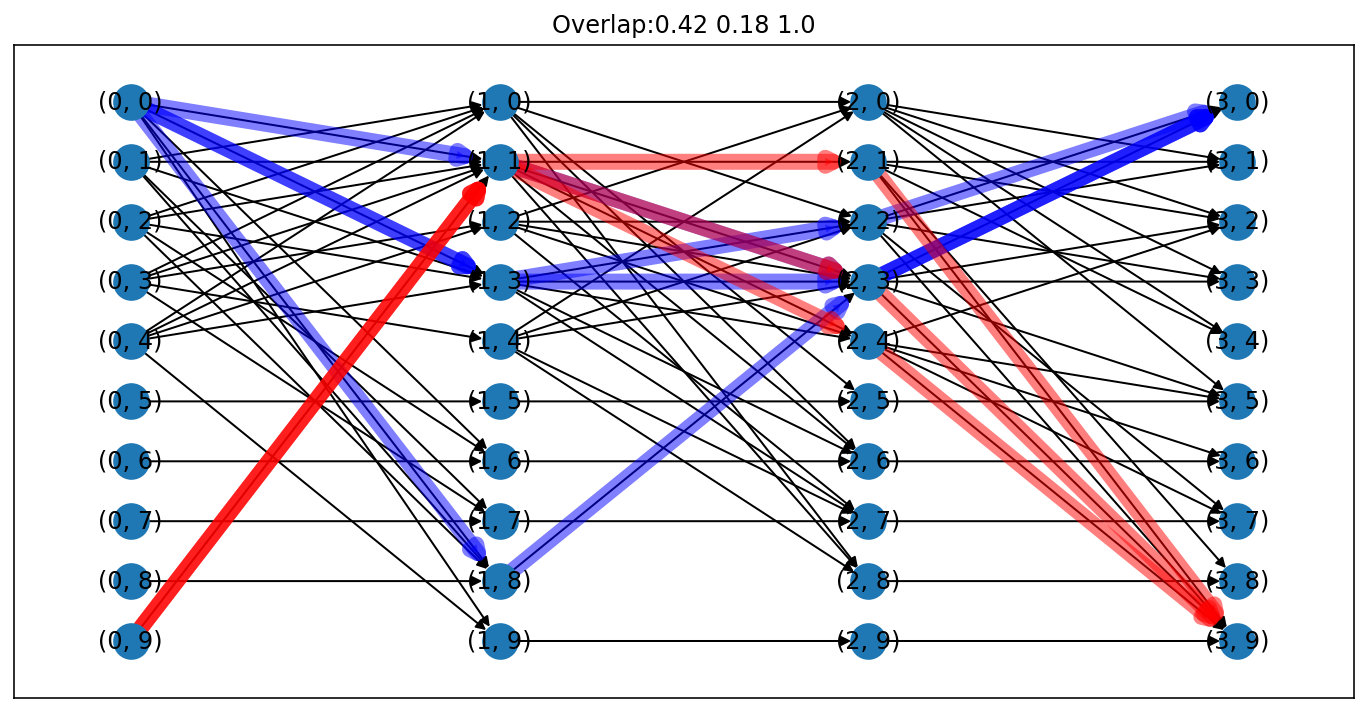

In [13]:
test_paths1 = rew_paths[((0,0), (3,0))]
test_paths2 = rew_paths[((0,9), (3,9))]

fig = plt.figure(figsize=(12,6))
nx.draw_networkx(rew_MPG, pos)
ax = plt.gca()
draw_task_path_family(rew_MPG, pos, test_paths1, color='b', axis=ax)
draw_task_path_family(rew_MPG, pos, test_paths2, color='r', axis=ax)
noi = round(node_interference_overlap(test_paths1, test_paths2), 2)
poi = round(interference_overlap(test_paths1, test_paths2),2)
loi = round(layer_interference_overlap(rew_MPG, test_paths1, test_paths2),2)
plt.title('Overlap:' + str(poi) + ' ' +  str(noi) + ' ' +  str(loi));



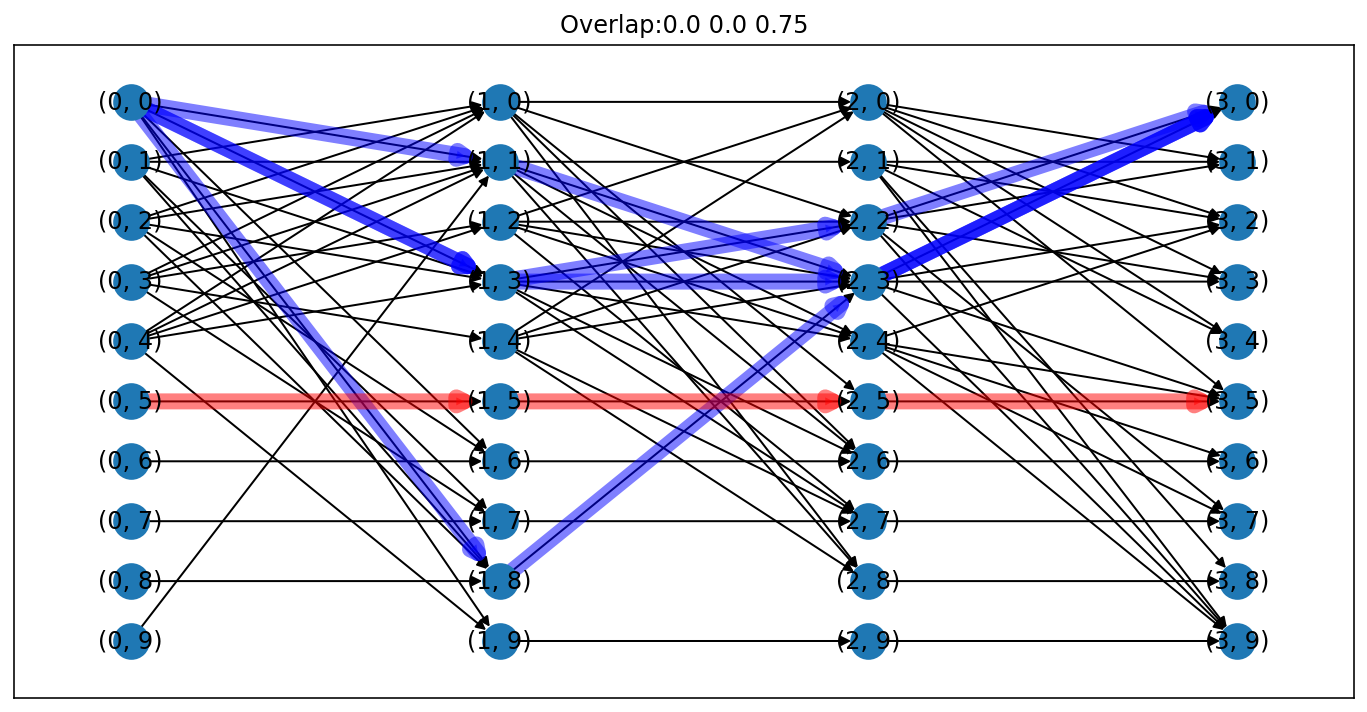

In [16]:
test_paths1 = rew_paths[((0,0), (3,0))]
test_paths2 = rew_paths[((0,5), (3,5))]

fig = plt.figure(figsize=(12,6))
nx.draw_networkx(rew_MPG, pos)
ax = plt.gca()
draw_task_path_family(rew_MPG, pos, test_paths1, color='b', axis=ax)
draw_task_path_family(rew_MPG, pos, test_paths2, color='r', axis=ax)
noi = round(node_interference_overlap(test_paths1, test_paths2), 2)
poi = round(interference_overlap(test_paths1, test_paths2),2)
loi = round(layer_interference_overlap(rew_MPG, test_paths1, test_paths2),2)
plt.title('Overlap:' + str(poi) + ' ' +  str(noi) + ' ' +  str(loi));


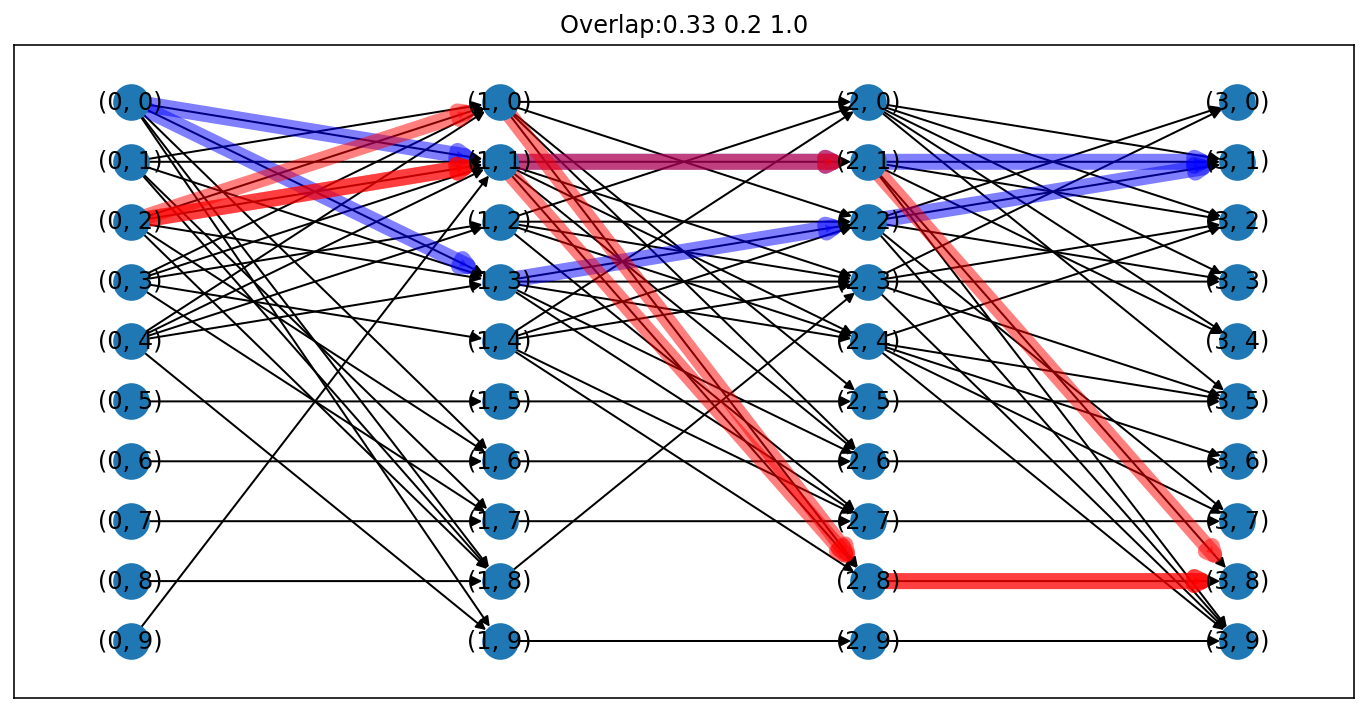

In [17]:
test_paths1 = rew_paths[((0,0), (3,1))]
test_paths2 = rew_paths[((0,2), (3,8))]

fig = plt.figure(figsize=(12,6))
nx.draw_networkx(rew_MPG, pos)
ax = plt.gca()
draw_task_path_family(rew_MPG, pos, test_paths1, color='b', axis=ax)
draw_task_path_family(rew_MPG, pos, test_paths2, color='r', axis=ax)
noi = round(node_interference_overlap(test_paths1, test_paths2), 2)
poi = round(interference_overlap(test_paths1, test_paths2),2)
loi = round(layer_interference_overlap(rew_MPG, test_paths1, test_paths2),2)
plt.title('Overlap:' + str(poi) + ' ' +  str(noi) + ' ' +  str(loi));


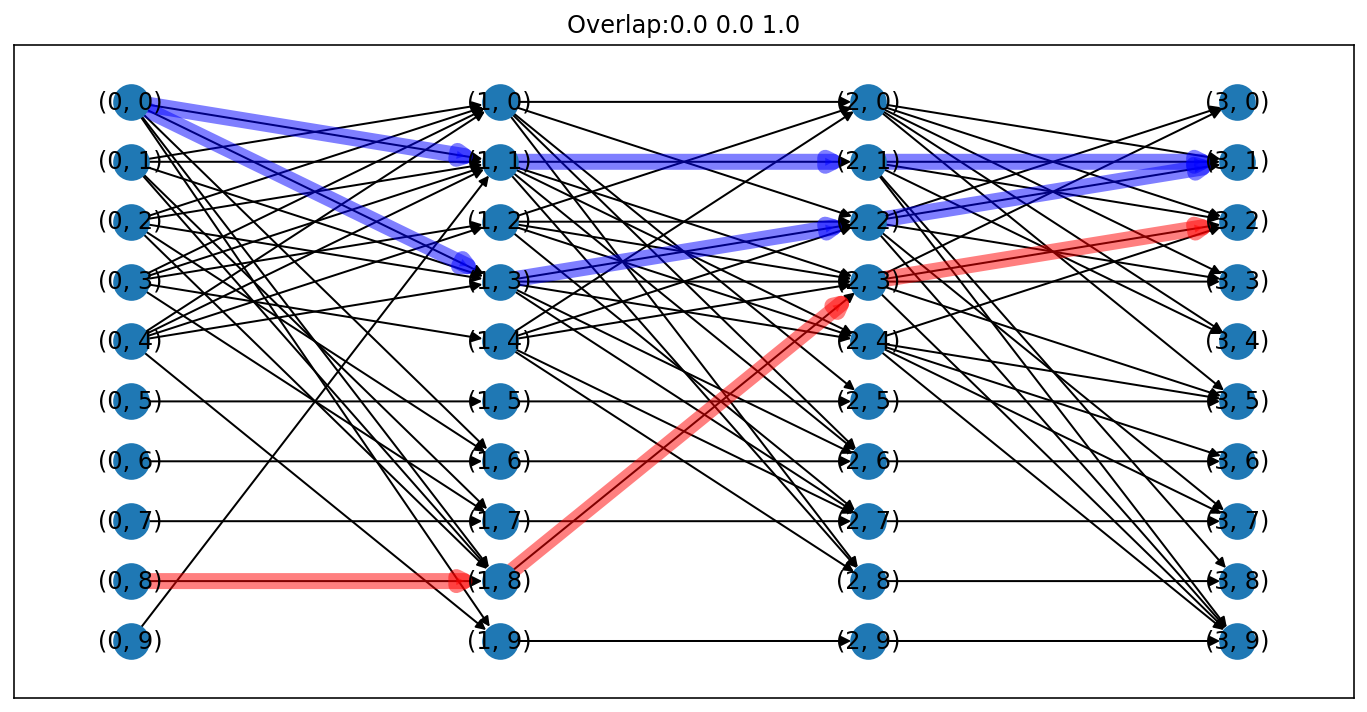

In [19]:
test_paths1 = rew_paths[((0,0), (3,1))]
test_paths2 = rew_paths[((0,8), (3,2))]

fig = plt.figure(figsize=(12,6))
nx.draw_networkx(rew_MPG, pos)
ax = plt.gca()
draw_task_path_family(rew_MPG, pos, test_paths1, color='b', axis=ax)
draw_task_path_family(rew_MPG, pos, test_paths2, color='r', axis=ax)
noi = round(node_interference_overlap(test_paths1, test_paths2), 2)
poi = round(interference_overlap(test_paths1, test_paths2),2)
loi = round(layer_interference_overlap(rew_MPG, test_paths1, test_paths2),2)
plt.title('Overlap:' + str(poi) + ' ' +  str(noi) + ' ' +  str(loi));

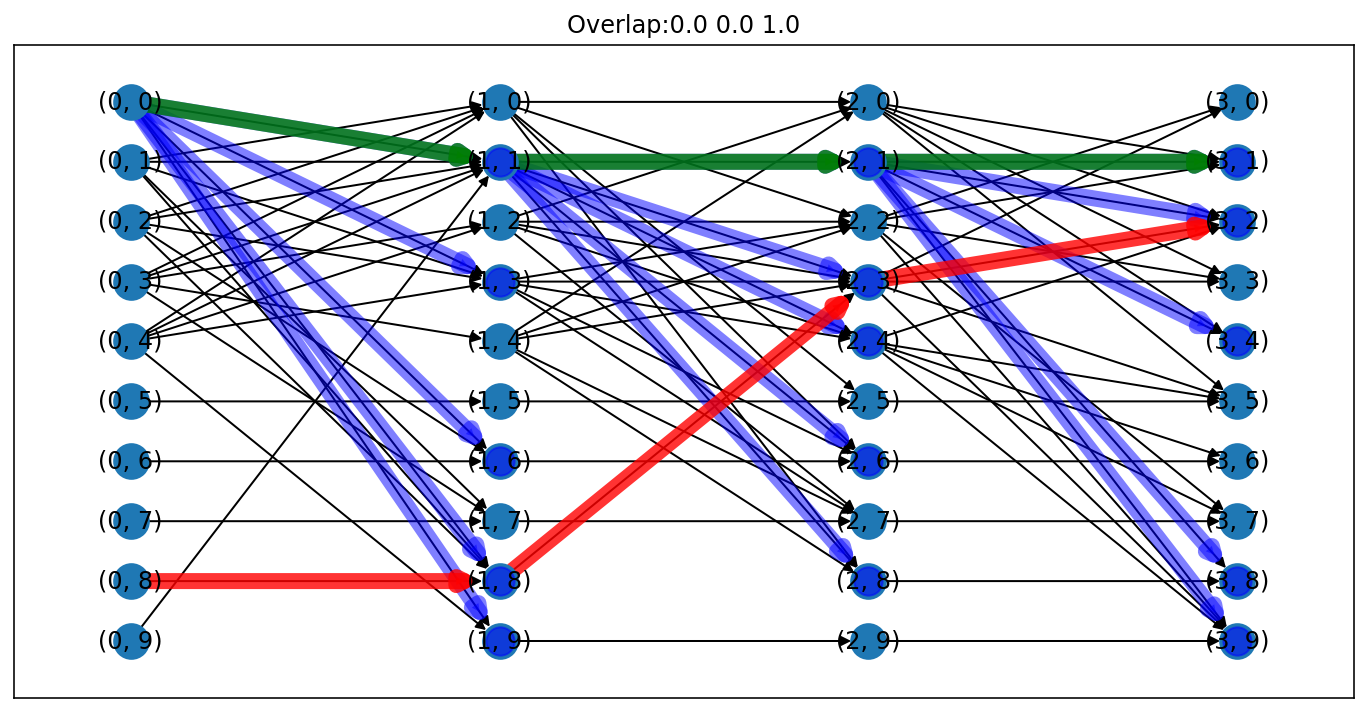

In [20]:
test_paths1 = rew_paths[((0,0), (3,1))]
test_paths2 = rew_paths[((0,8), (3,2))]

fig = plt.figure(figsize=(12,6))
nx.draw_networkx(rew_MPG, pos)
ax = plt.gca()
draw_task_path_shadow(rew_MPG, pos, test_paths1[0], color='b', axis=ax)
draw_individual_task_path(rew_MPG, pos, test_paths1[0], color='g', axis=ax)
draw_individual_task_path(rew_MPG, pos, test_paths2[0], color='r', axis=ax)
noi = round(node_interference_overlap(test_paths1, test_paths2), 2)
poi = round(interference_overlap(test_paths1, test_paths2),2)
loi = round(layer_interference_overlap(rew_MPG, test_paths1, test_paths2),2)
plt.title('Overlap:' + str(poi) + ' ' +  str(noi) + ' ' +  str(loi));

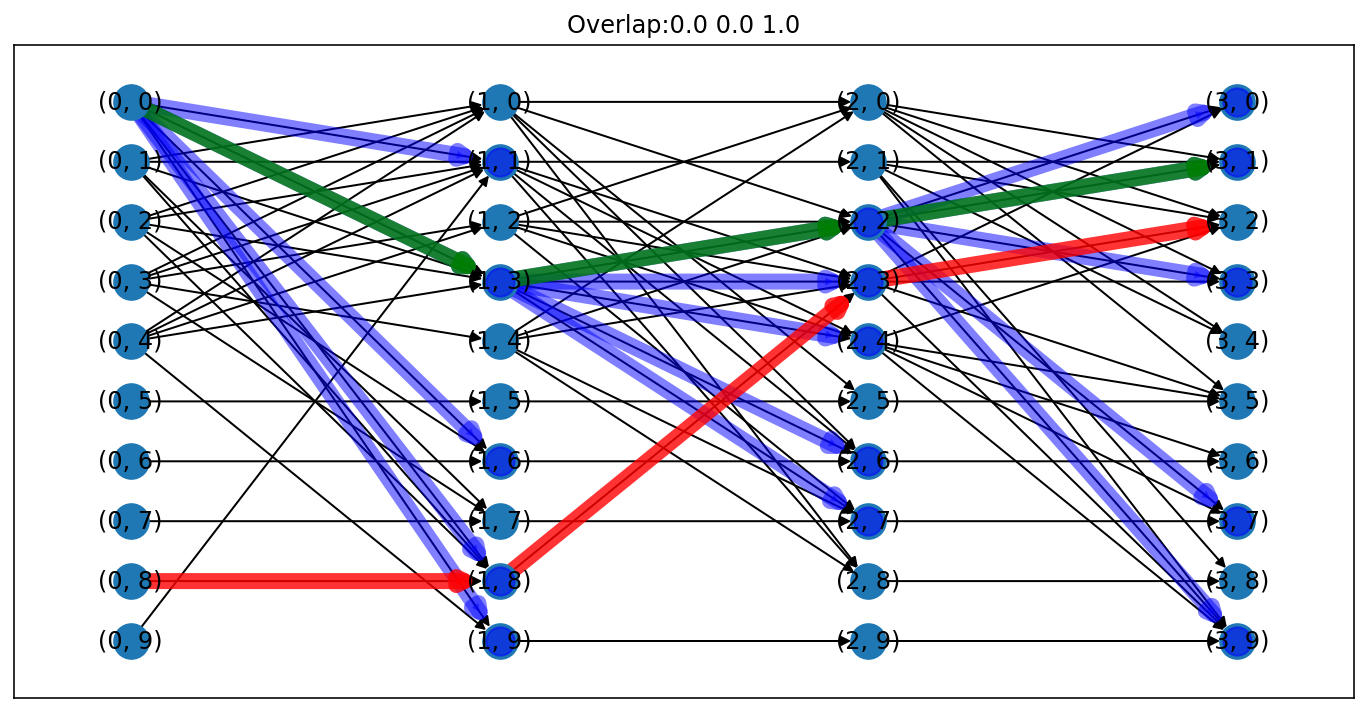

In [30]:
test_paths1 = rew_paths[((0,0), (3,1))]
test_paths2 = rew_paths[((0,8), (3,2))]

fig = plt.figure(figsize=(12,6))
nx.draw_networkx(rew_MPG, pos)
ax = plt.gca()
draw_task_path_shadow(rew_MPG, pos, test_paths1[1], color='b', axis=ax)
draw_individual_task_path(rew_MPG, pos, test_paths1[1], color='g', axis=ax)
draw_individual_task_path(rew_MPG, pos, test_paths2[0], color='r', axis=ax)
noi = round(node_interference_overlap(test_paths1, test_paths2), 2)
poi = round(interference_overlap(test_paths1, test_paths2),2)
loi = round(layer_interference_overlap(rew_MPG, test_paths1, test_paths2),2)
plt.title('Overlap:' + str(poi) + ' ' +  str(noi) + ' ' +  str(loi));